# Objective:- We want to prepare a model for predictions of profit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
startup=pd.read_csv("D:/Data sets/50_startups.csv")

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# We will remove the state column beacuse it have nominal data 

In [5]:
startup.drop('State',axis=1,inplace=True)

In [6]:
startup.head() 

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
startup.info() #No null missing value present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup.rename(columns={'R&D Spend':'rdspend' , "Marketing Spend" : "mrktspend"}, inplace=True) #change the column name 

In [10]:
startup.head() ##This is our new dataframe we will continue with it

,rdspend,Administration,mrktspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
startup.corr() ##correlation b/w the variables

,rdspend,Administration,mrktspend,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
mrktspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

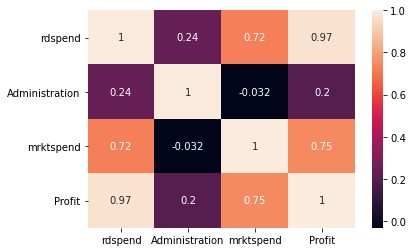

In [12]:
sns.heatmap(startup.corr(), annot = True)

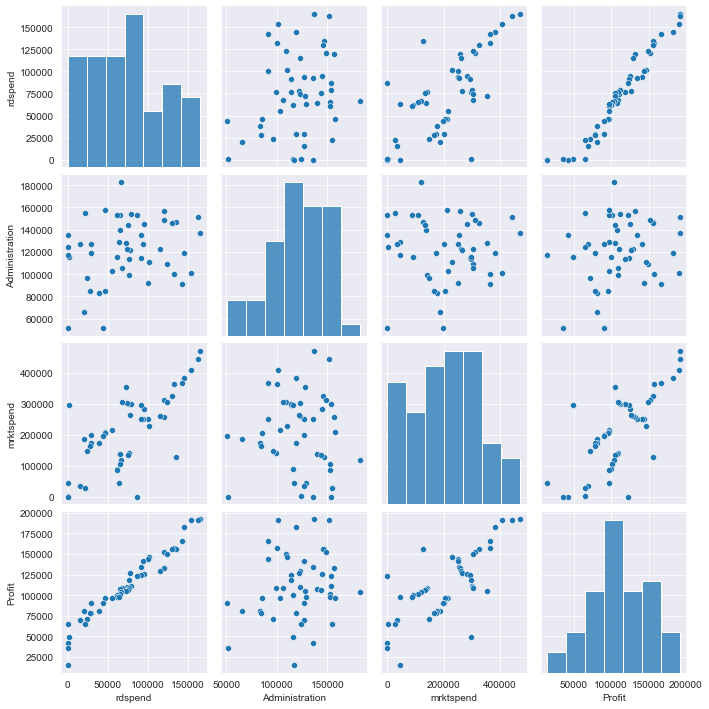

In [36]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)


# We will create a base model 

In [38]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~rdspend+Administration+mrktspend',data=startup).fit()
 #Probability of Administration & mrktspend are greater than 0.05 it mean both are insignificant

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        18:27:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
mrktspend          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [53]:
rsq_rd = smf.ols('rdspend~Administration+mrktspend',data=startup).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_mr = smf.ols('mrktspend~rdspend+Administration',data=startup).fit().rsquared  
vif_mr = 1/(1-rsq_mr)

rsq_adm = smf.ols('Administration~mrktspend+rdspend',data=startup).fit().rsquared  
vif_adm = 1/(1-rsq_adm)

d1 = {'Variables':['RnD','Mrkt','adms'],'VIF':[vif_rd,vif_mr,vif_adm]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
##VIF is less than 10 than we can say no much collinearity b/w independent varible 

,Variables,VIF
0,RnD,2.468903
1,Mrkt,2.326773
2,adms,1.175091


# Test for Normality of Residuals (Q-Q Plot)

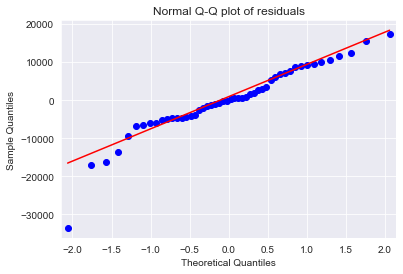

In [57]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [60]:
list(np.where(model.resid<-20000)) ## Outlier in the dataset

[array([49], dtype=int64)]

# We will check the Homoscedasticity

In [61]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

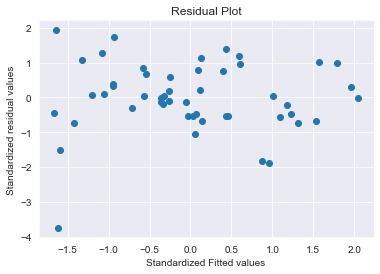

In [62]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##The residuals is fillowing approx Homoscedasticity but one outlier is there we will remove it  

# We will check the cook distance for outlier

In [63]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

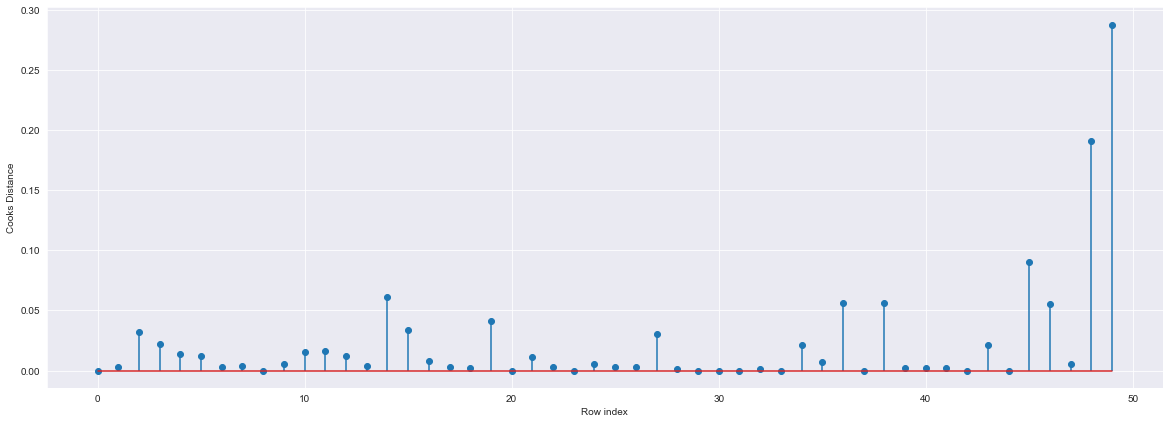

In [65]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [66]:
(np.argmax(c),np.max(c)) ##It is the outlier in our dataset

(49, 0.2880822927543267)

# Will check the laverage influence plot for detection of outlier in our dataset

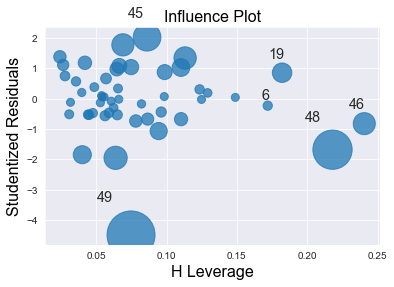

In [67]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [70]:
startup[startup.index.isin([49])] ##We will remove the 49 from our dataset

,rdspend,Administration,mrktspend,Profit
49,0.0,116983.8,45173.06,14681.4


In [74]:
startup1=startup.drop(startup.index[[49]],axis=0).reset_index()

In [76]:
startup1=startup1.drop(['index'],axis=1)

In [77]:
startup1.head()

,rdspend,Administration,mrktspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# We will create a new model after removing influence 

In [154]:
new_model = smf.ols('Profit~rdspend+Administration+mrktspend',data=startup1).fit()

In [155]:
new_model.summary()
##Here Administration have pvalue is greater than 0.05 means it is in significant so we will try transformation for better result 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           8.85e-32
Time:                        19:40:22   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rdspend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
mrktspend          0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will apply the cubic transformation on the for better result 

In [157]:
Final_model = smf.ols('Profit~rdspend+np.square(Administration)*Administration+np.square(mrktspend)*mrktspend',data=startup1).fit()

In [158]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           8.08e-29
Time:                        19:44:41   Log-Likelihood:                -504.12
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      42   BIC:                             1035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 3.856e-05   5.97e-06      6.458      0.000    2.65e-05    5.06e-05
rdspend                                      0.7758      0.039     19.779      0.000       0.697       0.855
np.square(Administration)                -1.073e-05   2.97e-06     -3.613      0.001   -1.67e-05   -4.74e-06
Administration                               1.3333      0.206      6.474      0.000       0.918       1.749
np.square(Administration):Administration  2.645e-11   1.13e-11      2.348      0.024    3.71e-12    4.92e-11
np.square(mrktspend)                     -3.931e-07   3.53e-07     -1.114      0.272   -1.11e-06    3.19e-07
mrktspend                                    0.0807      0.067      1.201      0.236      -0.055       0.216
np.square(mrktspend):mrktspend            6.416e-13    5.2e-13      1.233      0.224   -4.08e-13    1.69e-12
==============================================================================
Omnibus:                        2.312   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.501
Skew:                           0.170   Prob(JB):                        0.472
Kurtosis:                       2.213   Cond. No.                     9.64e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Vs Regression

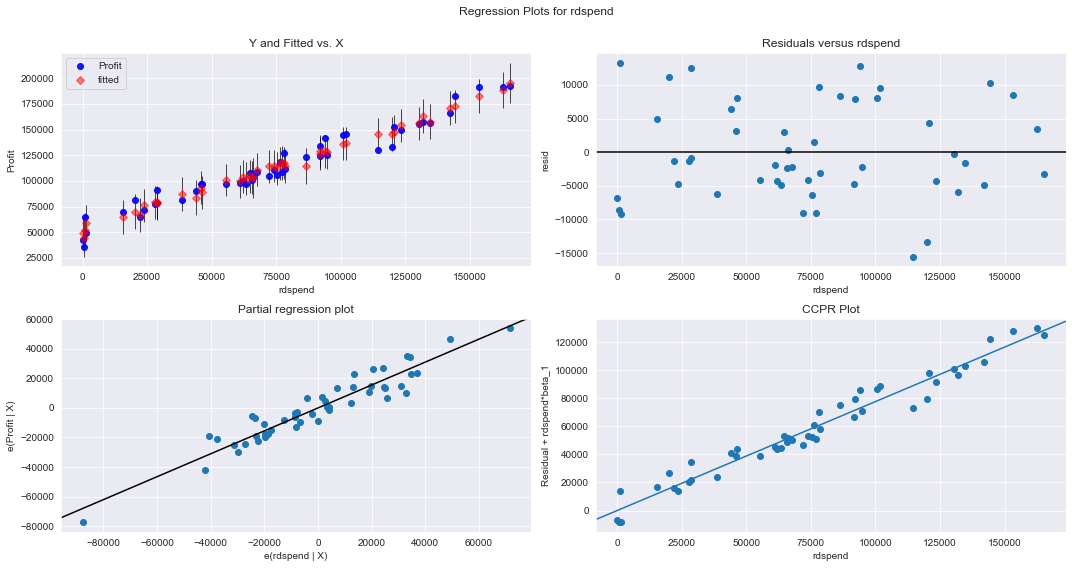

In [160]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Final_model, "rdspend", fig=fig)
plt.show()

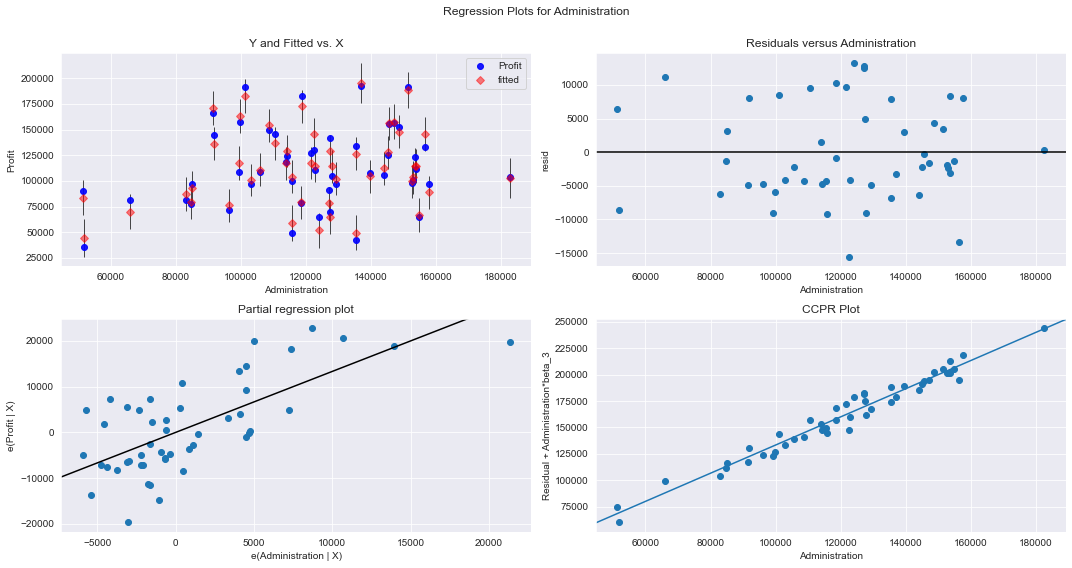

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Final_model, "Administration", fig=fig)
plt.show()

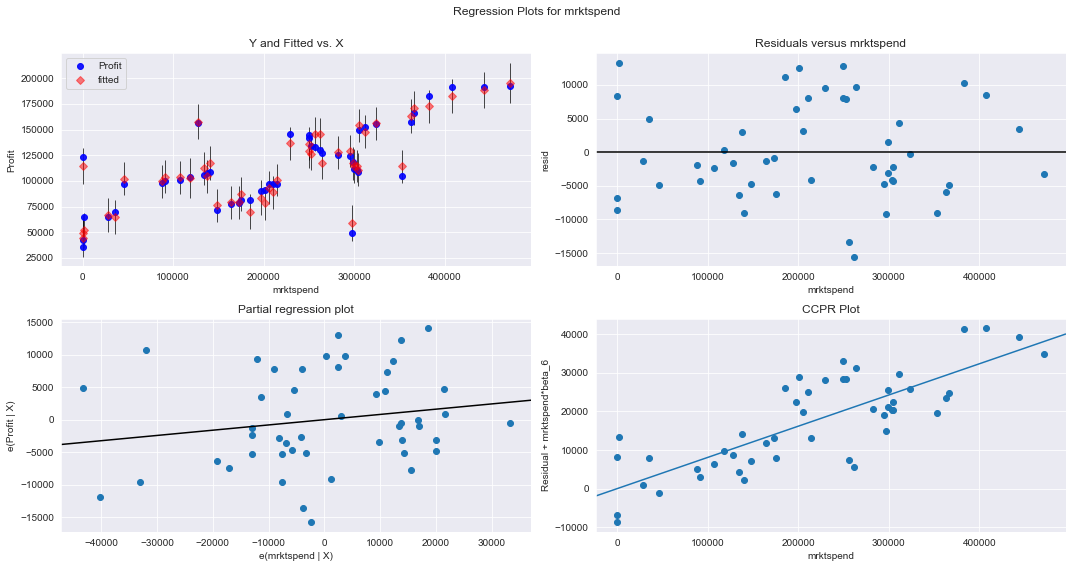

In [162]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Final_model, "mrktspend", fig=fig)
plt.show()

# RMSE

In [164]:
pred=Final_model.predict(startup1)

In [168]:
np.sqrt(np.mean(startup1.Profit-Final_model.predict(startup1))**2)

8.3119083806339

# Predict Profit using final model

In [170]:
Final_model.predict(startup1.iloc[0:5,])

0    195497.939734
1    188292.353735
2    182544.350319
3    172607.868574
4    171004.561290
dtype: float64

# Conclusion:-We will consider the last model (final_model) for profit prediction With using the cubic transformation
R-squared value of Final model is 0.965 & Adj_R-square value is 0.960 both are greater than comparison of other model

Probability value is less than 0.05 of all attributes means all attributes are significant




In [171]:
d1 = {'Model':['Base Model','Model1','Final_Model'],'R_square':[0.951,0.961,0.965]}
R_square = pd.DataFrame(d1)  
R_square

,Model,R_square
0,Base Model,0.951
1,Model1,0.961
2,Final_Model,0.965


# Note:- I have tried different type of transformation with model but i have gotten better result apply cubic transformation with adminastration & marketing attributes 
# And apply of other transformation the prbability value was insignificant but i have gotten better result with it  